In [16]:
import pandas as pd
import numpy as np
import altair as alt
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [17]:
whitewine = pd.read_csv('Data/winequality-white.csv', sep=';')
redwine = pd.read_csv('Data/winequality-red.csv', sep=';')

whitewine["type"] = "white"
redwine["type"] = "red"
wine_df = redwine.append(whitewine)

wine_df.loc[0] = ['g/dm3','g/dm3','g/dm3','g/dm3','g/dm3','mg/dm3','mg/dm3','g/cm3', np.nan,'g/dm3','%vol', np.nan, np.nan]
wine_df.to_csv('wine_new.csv', index=False)

In [18]:
wine = pd.read_csv('wine_new.csv', header=[0,1])
wine.columns = wine.columns.map(' in '.join)
wine = wine.rename(columns = {'pH in Unnamed: 8_level_1':'pH', 'quality in Unnamed: 11_level_1':'quality', 'type in Unnamed: 12_level_1': 'type'})
wine['quality_factor'] = np.where(wine['quality']<6, 'Bad', (np.where(wine['quality']>6.5, 'Good', 'Average')))
wine

,fixed acidity in g/dm3,volatile acidity in g/dm3,citric acid in g/dm3,residual sugar in g/dm3,chlorides in g/dm3,free sulfur dioxide in mg/dm3,total sulfur dioxide in mg/dm3,density in g/cm3,pH,sulphates in g/dm3,alcohol in %vol,quality,type,quality_factor
0,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,Bad
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0,red,Bad
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6.0,red,Average
3,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,Bad
4,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,red,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.5,11.2,6.0,white,Average
6492,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.9949,3.15,0.46,9.6,5.0,white,Bad
6493,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6.0,white,Average
6494,5.5,0.29,0.3,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7.0,white,Good


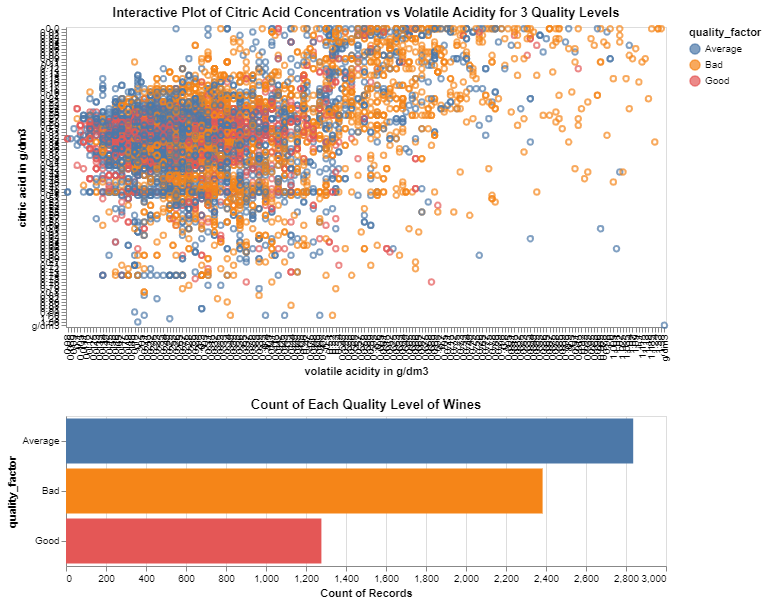

In [19]:
# Acids

brush = alt.selection_interval()

points = alt.Chart(wine, title="Interactive Plot of Citric Acid Concentration vs Volatile Acidity for 3 Quality Levels"
).mark_point().encode(
    alt.X('volatile acidity in g/dm3', scale=alt.Scale(zero=False)),
    alt.Y('citric acid in g/dm3', scale=alt.Scale(zero=False)),
    color=alt.condition(brush, 'quality_factor:N', alt.value('lightgray'))
).add_selection(brush).properties(height=300, width=600).interactive()

bars = alt.Chart(wine, title="Count of Each Quality Level of Wines").mark_bar().encode(
    y='quality_factor:N',
    color='quality_factor:N',
    x='count(quality_factor):Q',
    tooltip='count(quality_factor):Q',
).transform_filter(brush).properties(height=150, width=600)

points & bars